В этой части получаем графики зависимости фазы сгенерированной от отклонения между полученной фазой и сгенерированной. Это делается для того чтобы определить насколько точно работают методы во всём возможном диапазоне. Графики строятся для разных частот сигнала. Таким образом получается оценить точность методов для разных фаз и частот сгенерированных сигналов

In [11]:
%load_ext autoreload 
%autoreload 2

import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(os.path.join(os.getcwd(), ".."))

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import importlib
import model as md
import view as vw

importlib.reload(md)
importlib.reload(vw)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\Артем\Desktop\Вуз\Аспирантура\Диссертация\Алгоритм\Relaxation_frequency_phase_algorithm\notebooks\Complex_ms\..


<module 'view' from 'c:\\Users\\Артем\\Desktop\\Вуз\\Аспирантура\\Диссертация\\Алгоритм\\Relaxation_frequency_phase_algorithm\\view\\__init__.py'>

In [12]:
def get_phase_hilbert(time, sig1, sig2, f_peak=440e3):
    phase1 = np.unwrap(np.angle(signal.hilbert(sig1)))
    phase2 = np.unwrap(np.angle(signal.hilbert(sig2)))
    
    phase_diff = np.rad2deg(phase2 - phase1)
    phase_diff = np.rad2deg(np.unwrap(np.angle(signal.hilbert(sig2)) - np.angle(signal.hilbert(sig1))))
    phase_diff = (phase_diff + 180) % 360 - 180 
    return time, phase_diff

In [13]:
def variate_phase(F, *phase_methods):
    phases_arrays = []
    phase_diff_arrays = []

    for phase_method in phase_methods:
        phases = []
        phase_diff = []
        for phase in range(1, 180, 1):
            duration = 100e-6
            fs = F * 40

            t = np.linspace(0, duration, int(duration * fs))
            U = md.generate_sin(t, F, 2)
            I = md.generate_sin(t, F, 2, phase)

            # Вызов метода напрямую
            time, phase_d = phase_method(t, U, I, F)

            phase_kde = md.get_kde_mode(phase_d)

            phases.append(phase)
            phase_diff.append(abs(phase_kde - phase))

        phases_arrays.append(phases)
        phase_diff_arrays.append(phase_diff)

    return phases_arrays, phase_diff_arrays

In [14]:
def plot_for_one_F(phase_methods,phases_arrays,phase_diff_arrays, title=""):
    fig = plt.figure(figsize=(6, 6))
    gs = fig.add_gridspec(2, 1)
    front = 12

    ax1 = fig.add_subplot(gs[0, 0])
    for i, method in enumerate(phase_methods):
        label_name = method.__name__.replace("get_phase_", "")
        ax1.plot(
            phases_arrays[i],
            np.abs(phase_diff_arrays[i]),
            label=label_name,
            linewidth=2
        )

    ax1.set_xlabel('Phase shift, °', fontsize=front)
    ax1.set_ylabel('Phase measurement deviation, °', fontsize=front)
    ax1.tick_params(axis='both', labelsize=front)
    ax1.grid(True)
    ax1.legend(fontsize=10)

    ax1.set_yscale('log')

    ax1.set_title(title, fontsize=front + 2)
    plt.tight_layout()
    plt.show()

In [15]:
phase_methods = [
    md.get_phase_maxpoint_diff,
    get_phase_hilbert,
    md.get_phase_FFT,
    md.get_phase_lockin,
    md.get_phase_xcorr2
]


In [16]:
F=444.4e3
phases_arrays, phase_diff_arrays = variate_phase(F, *phase_methods)

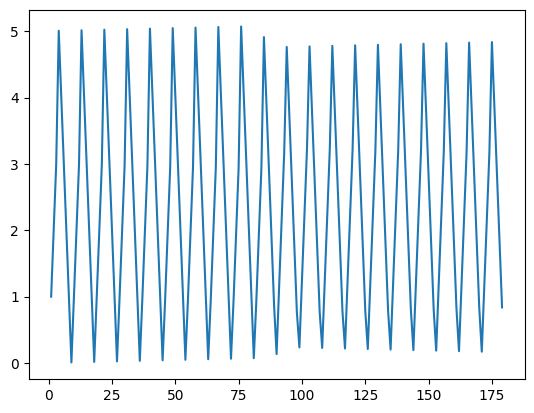

In [23]:
plt.plot(phases_arrays[0], phase_diff_arrays[0])

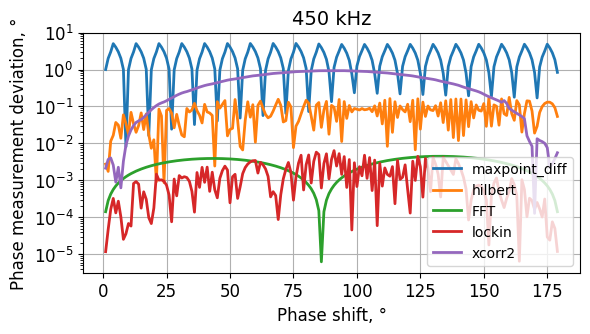

In [22]:
plot_for_one_F(phase_methods,phases_arrays, phase_diff_arrays,str(int(F/1000))+" kHz" )

In [18]:
print(phases_arrays[0])
print(phase_diff_arrays[0])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(5.008108108109576), np.float64(4.008108108109576), np.float64(3.0081081081095764), np.float64(2.0081081081095764), np.float64(1.0081081081095764), np

In [19]:
F_range=[]
KDE_range=[]

for F in range (int(300e3),int(500e3),int(50e3)):
    KDE_methods=[]
    F_range.append(F)
    phases,phases_diff=variate_phase(F,*phase_methods)

    for i in range(0,len(phases_diff),1):
        KDE_methods.append(md.get_kde_mode(phases_diff[i]))
    KDE_range.append(KDE_methods)
    print(KDE_methods)



[np.float64(3.005930778060916), np.float64(0.0004461784803769181), np.float64(0.0034918234269174188), np.float64(0.0004832434492951874), np.float64(0.0905956813114594)]
[np.float64(1.9981661432702753), np.float64(0.0004543327129406367), np.float64(0.0030439757131501136), np.float64(0.000427651319002043), np.float64(0.09008133659131055)]
[np.float64(1.9991116820391013), np.float64(0.00045666909294070964), np.float64(0.0027054629636738157), np.float64(0.00039238313659372515), np.float64(0.08950773838960388)]
[np.float64(1.9983735820317146), np.float64(0.00045386031220840816), np.float64(0.002444276638589875), np.float64(0.00028465123797735654), np.float64(0.09025000146930083)]


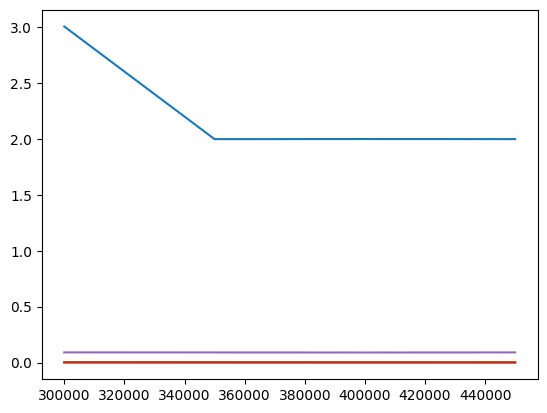

In [20]:
plt.plot(F_range,KDE_range)